In [5]:
# Notebooks developed by Jason Brownlee and slightly modified by Bertrand Brelier to show the stability of AUC 
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import random
from sklearn.metrics import roc_curve, auc, roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000000, n_classes=2, random_state=1, weights=[0.5, 0.5])
Data0 = list(filter(lambda x:x[1]==0,zip(X,y)))
Data1 = list(filter(lambda x:x[1]==1,zip(X,y)))

Logistic ROC AUC 0.975


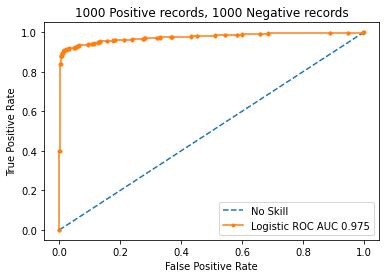

In [6]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=400, n_classes=2, random_state=1, weights=[0.5, 0.5])
random.seed(4)
Data = random.sample(Data0, 1000) + random.sample(Data1, 1000)
X = list(map(lambda x:x[0],Data))
y = list(map(lambda x:x[1],Data))
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
pyplot.plot(fpr, tpr, marker='.', label='Logistic ROC AUC %.3f' % roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("1000 Positive records, 1000 Negative records")
# show the plot
pyplot.savefig("BalancedDataset.png")
pyplot.show()

Logistic ROC AUC 0.965


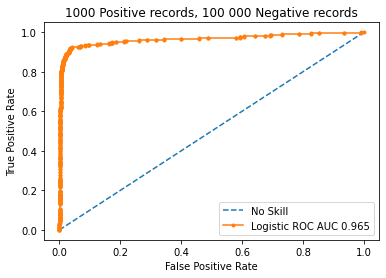

In [7]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
random.seed(4)
Data = random.sample(Data0, 100000) + random.sample(Data1, 1000)
X = list(map(lambda x:x[0],Data))
y = list(map(lambda x:x[1],Data))
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
pyplot.plot(fpr, tpr, marker='.', label='Logistic ROC AUC %.3f' % roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("1000 Positive records, 100 000 Negative records")
# show the plot
pyplot.savefig("ImbalancedDataset.png")
pyplot.show()

Logistic ROC AUC 0.499


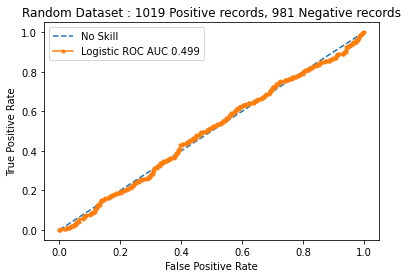

In [29]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=400, n_classes=2, random_state=1, weights=[0.5, 0.5])
random.seed(4)
Data = random.sample(Data0, 1000) + random.sample(Data1, 1000)
X = list(map(lambda x:x[0],Data))
y = list(map(lambda x:x[1],Data))
y = list(map(lambda x:0 if random.random()<0.5 else 1,y)) #make the target random, keeping the balance
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
pyplot.plot(fpr, tpr, marker='.', label='Logistic ROC AUC %.3f' % roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("Random Dataset : "+str(sum(y))+" Positive records, "+str(len(y)-sum(y))+" Negative records")
# show the plot
pyplot.savefig("RandomBalancedDataset.png")
pyplot.show()

Logistic ROC AUC 0.499


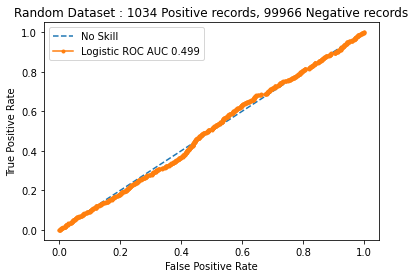

In [30]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
random.seed(4)
Data = random.sample(Data0, 100000) + random.sample(Data1, 1000)
X = list(map(lambda x:x[0],Data))
y = list(map(lambda x:x[1],Data))
y = list(map(lambda x:0 if random.random()<0.99 else 1,y))#make the target random, keeping the imbalance

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
pyplot.plot(fpr, tpr, marker='.', label='Logistic ROC AUC %.3f' % roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("Random Dataset : "+str(sum(y))+" Positive records, "+str(len(y)-sum(y))+" Negative records")
# show the plot
pyplot.savefig("RandomImbalancedDataset.png")
pyplot.show()